In [1]:
import pandas as pd
import numpy as np
import nltk 
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer
from nltk.corpus import stopwords 
from nltk.tokenize import word_tokenize 
import re 
import os
import sys
import matplotlib.pyplot as plt
import folium as fm
from wordcloud import WordCloud, STOPWORDS, ImageColorGenerator
%matplotlib inline

path1 = r'D:\DIT\Python Programs\DataMining\data\april'
path2 = r'D:\DIT\Python Programs\DataMining\data\febrouary'
path3 = r'D:\DIT\Python Programs\DataMining\data\march'
df1=pd.read_csv(path1+"\\"+"listings.csv",usecols=[
'id',
'zipcode',
'transit',
'bedrooms',
'beds',
'review_scores_rating',
'number_of_reviews',
'neighbourhood',
'name',
'latitude',
'longitude',
'last_review',
'instant_bookable',
'host_since',
'host_response_rate',
'host_identity_verified',
'host_has_profile_pic',
'first_review',
'description',
'city',
'cancellation_policy',
'bed_type',
'bathrooms',
'accommodates',
'amenities',
'room_type',
'property_type',
'price',
'availability_365',
'minimum_nights'
])
df2=pd.read_csv(path2+"\\"+"listings.csv",usecols=[
'id',
'zipcode',
'transit',
'bedrooms',
'beds',
'review_scores_rating',
'number_of_reviews',
'neighbourhood',
'name',
'latitude',
'longitude',
'last_review',
'instant_bookable',
'host_since',
'host_response_rate',
'host_identity_verified',
'host_has_profile_pic',
'first_review',
'description',
'city',
'cancellation_policy',
'bed_type',
'bathrooms',
'accommodates',
'amenities',
'room_type',
'property_type',
'price',
'availability_365',
'minimum_nights'
])
df3=pd.read_csv(path3+"\\"+"listings.csv",usecols=[
'id',
'zipcode',
'transit',
'bedrooms',
'beds',
'review_scores_rating',
'number_of_reviews',
'neighbourhood',
'name',
'latitude',
'longitude',
'last_review',
'instant_bookable',
'host_since',
'host_response_rate',
'host_identity_verified',
'host_has_profile_pic',
'first_review',
'description',
'city',
'cancellation_policy',
'bed_type',
'bathrooms',
'accommodates',
'amenities',
'room_type',
'property_type',
'price',
'availability_365',
'minimum_nights'
])
df1['month'] = 'April'
df1['month'].fillna('April', inplace = True)

df2['month'] = 'February'
df2['month'].fillna('February', inplace = True)

df3['month'] = 'March'
df3['month'].fillna('March', inplace = True)

df = df1.append(df2)
df = df.append(df3)
df.drop_duplicates(inplace=True)
df=df.dropna(axis=0, how="any")
df.to_csv('train.csv', index=False, header=True)

new_df=df.copy()
new_df.drop_duplicates(inplace=True,subset="id")

In [2]:
#Question 1.1

Entire home/apt: 4932


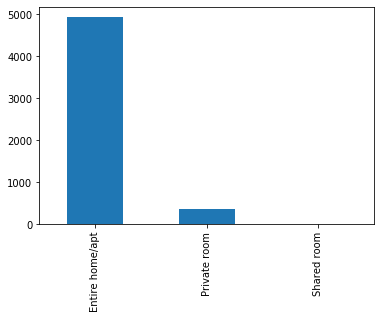

In [3]:
rtypes = new_df['room_type'].value_counts().index[0]
most_rtype=new_df['room_type'].value_counts().max()
print(rtypes+": %d" % most_rtype)
new_df['room_type'].value_counts().plot.bar();

In [4]:
#Question 1.2

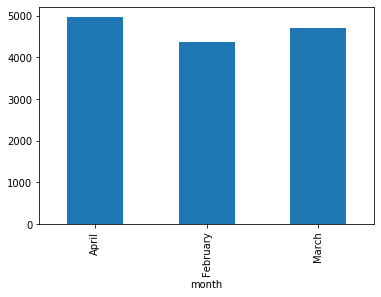

In [5]:
df.groupby('month')['price'].count().plot.bar();

In [6]:
#Question 1.3

1) Plaka : 972
2) Koukaki : 745
3) Neos Kosmos : 613
4) Kolonaki : 476
5) Pangrati : 384


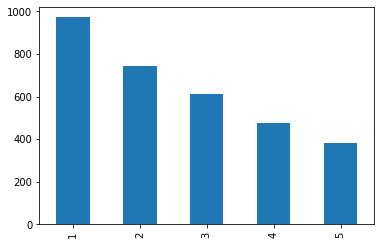

In [7]:
df.sort_values('number_of_reviews',inplace = True,ascending=False)
n_list=df['neighbourhood'].value_counts()[:5].index.tolist()
review_num=df['number_of_reviews'].value_counts()[:5].tolist()
for i in range(1,6):
    print("%d)"%i,n_list[i-1],": %d"%review_num[i-1])


df['number_of_reviews'].value_counts()[:5].plot.bar();    
    

In [8]:
#Question 1.4

Plaka: 660


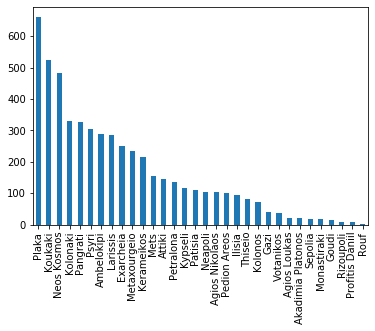

In [9]:
hood = new_df['neighbourhood'].value_counts().index[0]
num_hood=new_df['neighbourhood'].value_counts().max()
print(hood+": %d" % num_hood)
new_df['neighbourhood'].value_counts().plot.bar()

In [10]:
#Question 1.5

Registrations per neighbourhood

Plaka                660
Koukaki              523
Neos Kosmos          482
Kolonaki             330
Pangrati             328
Psyri                306
Ambelokipi           289
Larissis             284
Exarcheia            250
Metaxourgeio         236
Kerameikos           215
Mets                 154
Attiki               146
Petralona            135
Kypseli              115
Patisia              109
Neapoli              105
Agios Nikolaos       103
Pedion Areos         100
Ilisia                95
Thiseio               81
Kolonos               73
Gazi                  40
Votanikos             37
Agios Loukas          22
Akadimia Platonos     20
Sepolia               19
Monastiraki           19
Goudi                 13
Rizoupoli              9
Profitis Daniil        7
Rouf                   2
Name: neighbourhood, dtype: int64


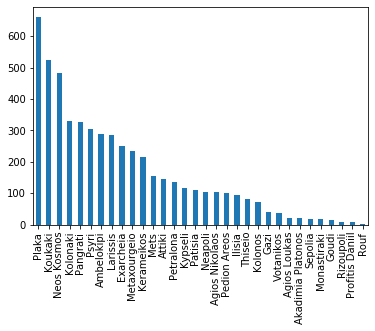

In [11]:
perhood= new_df['neighbourhood'].value_counts()
print("Registrations per neighbourhood\n")
print(perhood)
perhood.plot.bar()



Registrations per month

April       4968
February     315
March         24
Name: month, dtype: int64


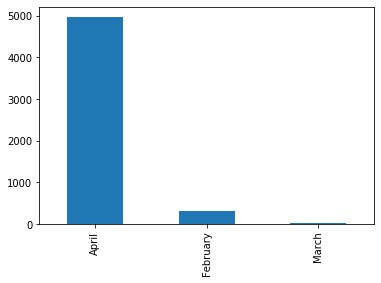

In [12]:
permonth=new_df['month'].value_counts()
print("\n\nRegistrations per month\n")
print(permonth)
permonth.plot.bar()

In [13]:
#Question 1.6

<BarContainer object of 32 artists>

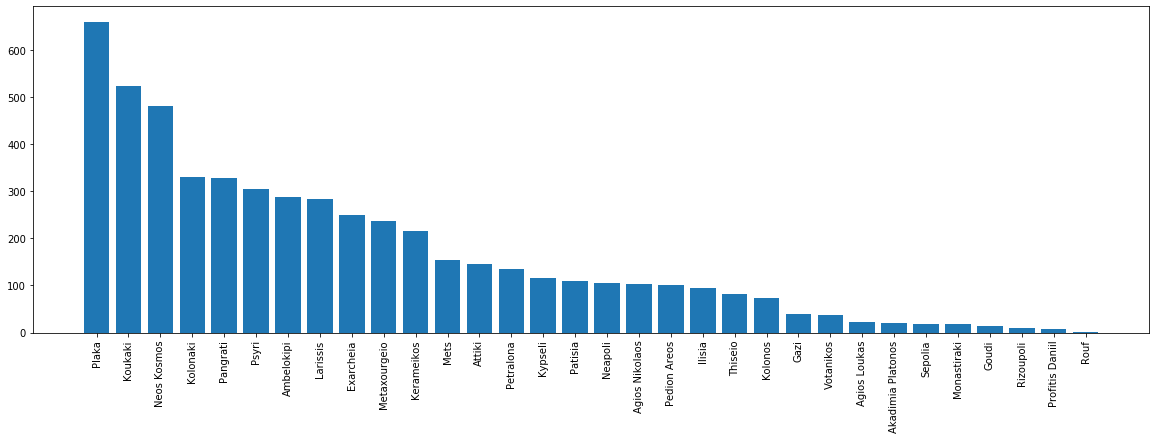

In [14]:
hoods=[]
frequency=[]
for i,j in perhood.items():
  hoods.append(i)
  frequency.append(j)
plt.figure(figsize=(20,6))
y_pos = range(len(hoods))
plt.xticks(y_pos,hoods, rotation=90)
plt.bar(hoods, frequency)

#i hope you didn't just need a plt.hist(perhoods) histogram...

In [15]:
#In case you actually wanted that just uncomment the line below
#plt.hist(perhood)

In [16]:
#Question 1.7

In [17]:
new_df.groupby(['neighbourhood'])['room_type'].agg(pd.Series.mode)

neighbourhood
Agios Loukas         Entire home/apt
Agios Nikolaos       Entire home/apt
Akadimia Platonos    Entire home/apt
Ambelokipi           Entire home/apt
Attiki               Entire home/apt
Exarcheia            Entire home/apt
Gazi                 Entire home/apt
Goudi                Entire home/apt
Ilisia               Entire home/apt
Kerameikos           Entire home/apt
Kolonaki             Entire home/apt
Kolonos              Entire home/apt
Koukaki              Entire home/apt
Kypseli              Entire home/apt
Larissis             Entire home/apt
Metaxourgeio         Entire home/apt
Mets                 Entire home/apt
Monastiraki          Entire home/apt
Neapoli              Entire home/apt
Neos Kosmos          Entire home/apt
Pangrati             Entire home/apt
Patisia              Entire home/apt
Pedion Areos         Entire home/apt
Petralona            Entire home/apt
Plaka                Entire home/apt
Profitis Daniil      Entire home/apt
Psyri                Ent

In [18]:
#Question 1.8

In [19]:
print("The most expensive room type is:\n")
df['price']=df['price'].str.replace('$','') #remove str if you rerun the cell
df['price']=df['price'].str.replace(',','') #remove str if you rerun the cell
df['price']=df['price'].astype(float)
avg = df.groupby('room_type')['price'].mean()
print(avg.index[0]+ ": %f" % avg.max())

The most expensive room type is:

Entire home/apt: 57.560700


In [20]:
#Question 1.9

In [21]:
avg_lat = df1['latitude'].mean()
avg_long = df1['longitude'].mean()
map = fm.Map(location = [avg_lat,avg_long],zoom_start = 11)
for la,lo,pp in zip(df1['latitude'][0:100], df1['longitude'][0:100], df1['room_type']):
    fm.Marker(
        location=[la,lo],
        popup=pp,
        icon=fm.Icon(icon_color='white')
).add_to(map)
display(map)


In [22]:
#Question 1.10

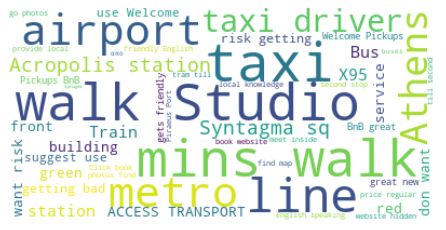

In [23]:
text = df['transit'].values
# Create and generate a word cloud image:
wordcloud = WordCloud(stopwords=STOPWORDS ,max_font_size=50, max_words=50, background_color="white").generate(str(text))
# Display the generated image:
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.tight_layout(pad=0)
plt.show()

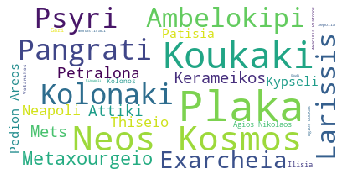

In [24]:
#create word cloud for neighbourhood
comment_words = ' '
stopwords = set(STOPWORDS) 

# iterate through the csv file 
for val in df['neighbourhood']: 

    # typecaste each val to string 
    val = str(val) 

    # split the value 
    tokens = val.split() 

    for words in tokens: 
        comment_words = comment_words + words + ' '


wordcloud = WordCloud(max_font_size=50, 
                background_color ='white', 
                stopwords = stopwords).generate(comment_words)
# plot the WordCloud image
plt.imshow(wordcloud) 
plt.axis("off")
plt.show()


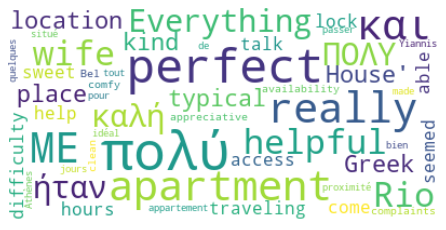

In [25]:
#create word cloud for last_review 
temp_df=df.copy()
rev_path1 = r'D:\DIT\Python Programs\DataMining\data\april\reviews.csv'
rev_path2 = r'D:\DIT\Python Programs\DataMining\data\febrouary\reviews.csv'
rev_path3 = r'D:\DIT\Python Programs\DataMining\data\march\reviews.csv'

rev_df1=pd.read_csv(rev_path1)
rev_df2=pd.read_csv(rev_path2)
rev_df3=pd.read_csv(rev_path3)

rev_df = rev_df1.append(rev_df2)
rev_df = rev_df.append(rev_df3)
rev_df.drop_duplicates(inplace=True)
rev_df=rev_df.dropna(axis=0, how="any")
rev_df.to_csv('rev.csv', index=False, header=True)

temp_df=temp_df.rename(columns={'id':'listing_id'})
temp_df=temp_df.rename(columns={'last_review':'date'})
merged=pd.merge(temp_df,rev_df,on=['listing_id','date'])
merged.to_csv('merged.csv', index=False, header=True)

text = merged['comments'].values
# Create and generate a word cloud image:
wordcloud = WordCloud(stopwords=STOPWORDS ,max_font_size=50, max_words=50, background_color="white").generate(str(text))
# Display the generated image:
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.tight_layout(pad=0)
plt.show()

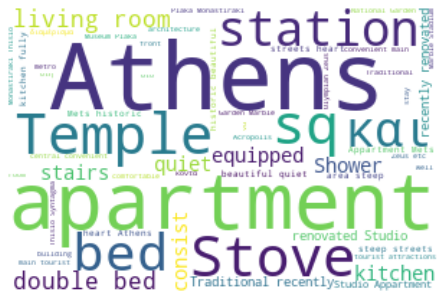

In [26]:
text = df['description'].values
# Create and generate a word cloud image:
wordcloud = WordCloud(width = 300,height = 200, background_color="white").generate(str(text))
# Display the generated image:
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.tight_layout(pad=0)
plt.show()

In [27]:
#Question 1.12

Athina: 4413


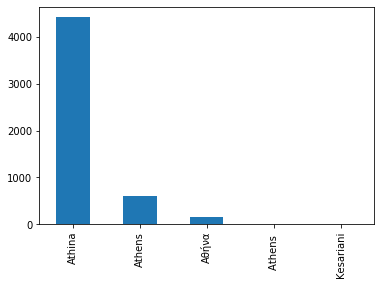

In [28]:
rtypes = new_df['city'].value_counts().index[0]
most_rtype=new_df['city'].value_counts().max()
print(rtypes+": %d" % most_rtype)
new_df['city'].value_counts()[:5].plot.bar();

Real Bed: 5254


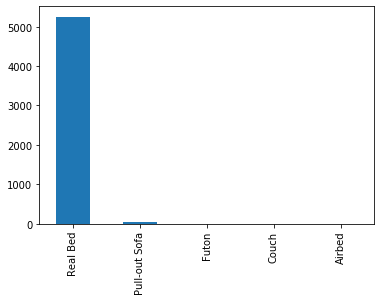

In [29]:
rtypes = new_df['bed_type'].value_counts().index[0]
most_rtype=new_df['bed_type'].value_counts().max()
print(rtypes+": %d" % most_rtype)
new_df['bed_type'].value_counts().plot.bar();

In [30]:
#Question 3

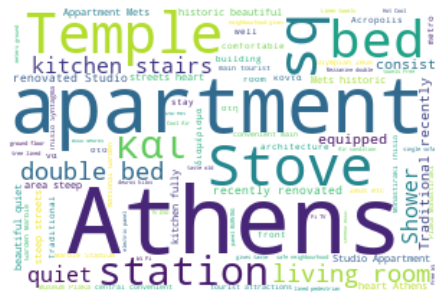

207     Trad Studio Appt -  Central Athens Traditional...
213     Trad Studio Appt -  Central Athens Traditional...
215     Trad Studio Appt -  Central Athens Traditional...
259     Acropolis Apartment brand new Our deluxe apart...
673     A private room & the whole house!!!! This is a...
                              ...                        
4534    KYMA Apartments - Athens Acropolis 3 Modern 1 ...
3897    Granny's House Το Granny's House βρίσκεται στο...
8884    Syntagma square  "Parliament apartment" It's l...
8869    Margaritas house Πρόσφατα πλήρως ανακαινισμένο...
9338    The Fla(r)t A nice cozy flat nearby the metro ...
Name: new_col, Length: 14016, dtype: object


In [31]:
rec_df = df[['id','name','description']].copy()

text = rec_df['description'].values
# Create and generate a word cloud image:
wordcloud = WordCloud(stopwords=STOPWORDS,width = 300,height = 200, background_color="white").generate(str(text))
# Display the generated image:
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.tight_layout(pad=0)
plt.show()

rec_df['new_col'] = rec_df['name'] + " " + rec_df['description']
rec_df['new_col'].fillna(value = 'NULL',inplace = True)
print(rec_df['new_col'])

In [32]:
#Question 3.1

In [33]:
txt1 = rec_df['new_col'].values

# Preprocessing 
def remove_string_specialcharacters(s): 

    # removes special characters with ' ' 
    stripped = re.sub('[^a-zA-z\s]', '', s) 
    stripped = re.sub('', '', stripped) 

    # Change any white space to one space 
    stripped = re.sub('\s+', ' ', stripped) 

    # Remove start and end white spaces 
    stripped = stripped.strip() 
    if stripped != '': 
            return stripped.lower() 


# stop_words = set(stopwords.words('english'))
# your_list = ['skills', 'ability', 'job', 'description'] 
# for i, line in enumerate(txt1): 
#     txt1[i] = ' '.join([x for 
#         x in nltk.word_tokenize(line) if 
#         ( x not in stop_words ) and ( x not in your_list )]) 


# Getting bigrams
vectorizer = CountVectorizer(ngram_range =(2, 2)) 
X1 = vectorizer.fit_transform(txt1)
features = (vectorizer.get_feature_names()) 
print("\n\nX1 : \n", X1.toarray()) 

# Applying TFIDF 
my_stop_words

vectorizer = TfidfVectorizer(ngram_range = (2, 2),stop_words = my_stop_words) 
X2 = vectorizer.fit_transform(txt1) 
scores = (X2.toarray()) 
print("\n\nScores : \n", scores) 

sums = X2.sum(axis = 0) 
data1 = [] 
for col, term in enumerate(features): 
    data1.append( (term, sums[0,col] )) 
ranking = pd.DataFrame(data1, columns = ['term','rank']) 
words = (ranking.sort_values('rank', ascending = False)) 
print ("\n\nWords : \n", words.head(7))

MemoryError: Unable to allocate 18.1 GiB for an array with shape (14016, 173777) and data type int64